In [3]:
!pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.14.0-py3-none-any.whl (131 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.41.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl 

In [4]:
import tensorflow as tf

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
#Build CNN Model
#Initializer
cnn=tf.keras.models.Sequential()

In [11]:
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[75,75,3]))

In [12]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D())

In [15]:
#Add 1 more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [17]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [18]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [19]:
#Compile the model
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
#Train the model
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=5)

Epoch 1/5
250/250 [==============================] - 53s 209ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6851 - val_accuracy: 0.5315
Epoch 2/5
250/250 [==============================] - 47s 188ms/step - loss: 0.6564 - accuracy: 0.6140 - val_loss: 0.6027 - val_accuracy: 0.6870
Epoch 3/5
250/250 [==============================] - 48s 192ms/step - loss: 0.6043 - accuracy: 0.6722 - val_loss: 0.5874 - val_accuracy: 0.6900
Epoch 4/5
250/250 [==============================] - 48s 193ms/step - loss: 0.5790 - accuracy: 0.6909 - val_loss: 0.5405 - val_accuracy: 0.7250
Epoch 5/5
250/250 [==============================] - 47s 190ms/step - loss: 0.5486 - accuracy: 0.7141 - val_loss: 0.5273 - val_accuracy: 0.7275


In [28]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("dataset/single_prediction/2.jpg",target_size=(75,75))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'
    
    

In [29]:
prediction

'dog'

In [30]:
import matplotlib.pyplot as plt
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


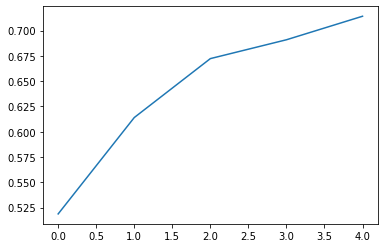

In [31]:
plt.plot(history.history['accuracy'])